In [38]:
# Predict mpg from features of a car
factors = ["Number of cylinders", "displacement", "Hoursepower", "Weight", "Acceleration", "Year"]

In [39]:
from numpy import array
import numpy as np

# Code to read this into python:
def read_mpg(filename):
   mpg = []
   features = []
   for ii in open(filename):
       if ii.startswith("#"):
         continue
       y, x = ii.split(' ', 1)
       mpg.append(float(y))
       feature_set = [float(feat.split(":")[1]) for feat in x.split()]
       features.append(feature_set[:-1])
   return array(features), array(mpg)

In [40]:
features, mpg = read_mpg('mpg.txt')
print len(features[0])
print len(mpg)

6
392


### If beta = 0, what's the intercept?

In [41]:
mpg.mean()

23.445918367346938

### What are the coefficients for OLS?

In [42]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(features, mpg)

# The coefficients
print'Coefficients: \n'
for ii, feature_coef in enumerate(regr.coef_):
    print factors[ii], feature_coef

Coefficients: 

Number of cylinders -0.329859089074
displacement 0.00767843024392
Hoursepower -0.000391355573761
Weight -0.00679461791338
Acceleration 0.0852732469472
Year 0.75336717975


### Lasso
* As you increase the weight of alpha, what feature dominates?

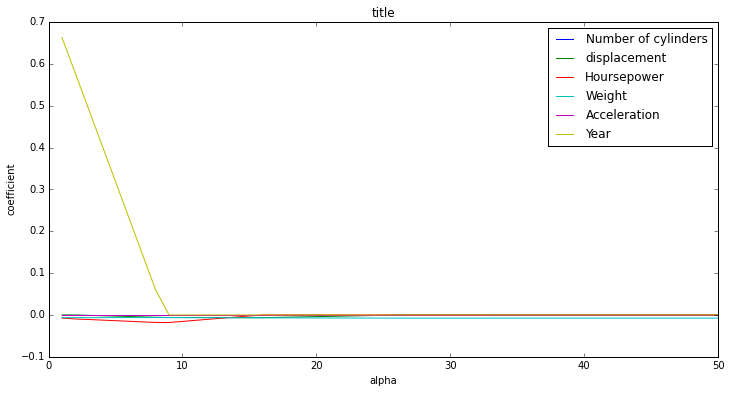

In [52]:
%matplotlib inline

from sklearn import linear_model
from pylab import *
import matplotlib.pyplot as plt

coefs = []
alphas = []
for alpha in xrange(1, 51):
    alphas.append(alpha)
    regr = linear_model.Lasso(alpha=alpha)
    regr.fit(features, mpg)
    coefs.append(regr.coef_)

coefs = zip(*coefs)
fig, ax = plt.subplots(figsize=(12,6))
for ii, coef_feature in enumerate(coefs):
    ax.plot(alphas, coef_feature, label=factors[ii])

ax.legend(loc=0); # upper left corner
ax.set_xlabel('alpha')
ax.set_ylabel('coefficient')
ax.set_title('title');